In [92]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Importing clean data for analysis

In [44]:
df = pd.read_csv('/Users/saikarthiknaladala/Downloads/Principles_of_Data_Science/studentperformance/clean_data/StudentsPerformance.csv')
df.head()

,Unnamed: 0,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,female,group B,bachelor's degree,standard,none,72,72,74
1,1,female,group C,some college,standard,completed,69,90,88
2,2,female,group B,master's degree,standard,none,90,95,93
3,3,male,group A,associate's degree,free/reduced,none,47,57,44
4,4,male,group C,some college,standard,none,76,78,75


### creating new column Average score of each student by taking the average of all the available scores

In [65]:
df['Total'] = df['math score']+df['reading score']+df['writing score']
df.head()

,Unnamed: 0,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total,grade
0,0,female,group B,bachelor's degree,standard,none,72,72,74,218,C
1,1,female,group C,some college,standard,completed,69,90,88,247,B
2,2,female,group B,master's degree,standard,none,90,95,93,278,A
3,3,male,group A,associate's degree,free/reduced,none,47,57,44,148,D
4,4,male,group C,some college,standard,none,76,78,75,229,C+


In [66]:
df["Average_Score"]=(df['math score']+df["reading score"]+df["writing score"])/3.0
print(df["Average_Score"])

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Name: Average_Score, Length: 1000, dtype: float64


In [71]:
def Grade(avg):
    if (avg >= 95):
        return 'A+'
    elif (avg>=90 and avg<95):
        return 'A'
    elif (avg>=85 and avg<90):
        return 'B+'
    elif (avg>=80 and avg<85):
        return 'B'
    elif (avg>=75 and avg<80):
        return 'C+'
    elif (avg>=70 and avg<75):
        return 'C'
    elif (avg>=60 and avg<70):
        return 'D+'
    elif (avg>=45 and avg<60):
        return 'D'
    else:
        return 'F'
    
    
df["grade"] = df.apply(lambda x : Grade(x["Average_Score"]),axis=1)
    

In [72]:
df.head()

,Unnamed: 0,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total,Average_Score,grade
0,0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,C
1,1,female,group C,some college,standard,completed,69,90,88,247,82.333333,B
2,2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,A
3,3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,D
4,4,male,group C,some college,standard,none,76,78,75,229,76.333333,C+


### using Seaborn for analysis

#### The below bar plot shows that females students gains more average score than male students. When there is one categorical column and a one numerical then bar plot is good to use and we can able to understand easily.

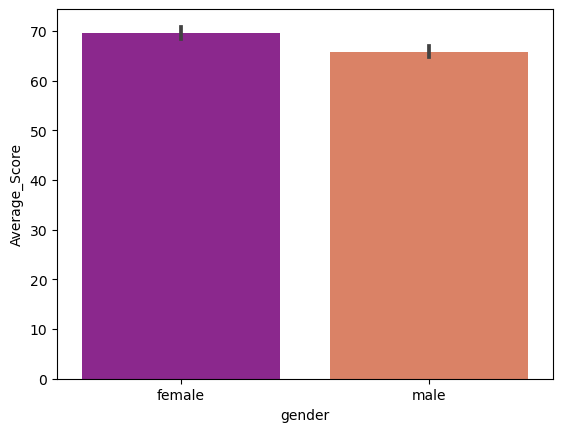

In [73]:
Plot = sns.barplot(x='gender', y='Average_Score',data=df,palette='plasma')
Img = Plot.get_figure()
Img.savefig("/Users/saikarthiknaladala/Downloads/Principles_of_Data_Science/studentperformance/results/Gender_Avg_Score.png")

#### the below boxplot describes the average score got based on race. Here we used hue ="gender'' as parameter, it  further add a categorical separation. From this we can say female students got more avg scores than males.

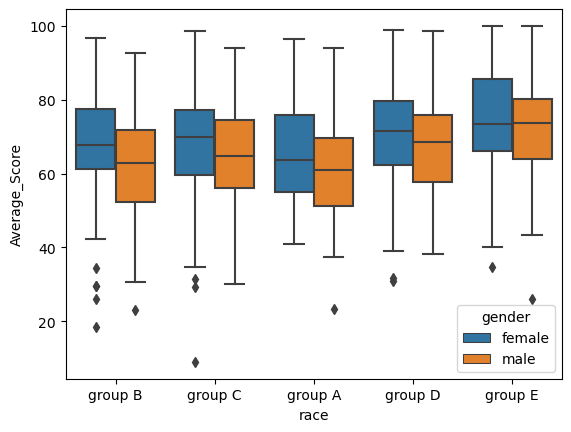

In [74]:
Plot = sns.boxplot(x='race',y='Average_Score',data=df,hue='gender')
Img = Plot.get_figure()
Img.savefig("/Users/saikarthiknaladala/Downloads/Principles_of_Data_Science/studentperformance/results/AvgScore_Basedon_Race.png")

#### the below scatter plot shows the relationship between the average score and math score and grouped by gender

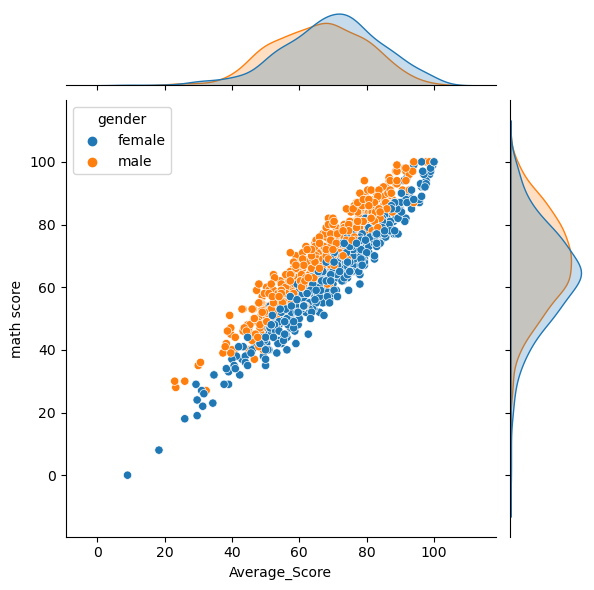

In [95]:
# Scatterplot with color dimension
sns.jointplot(x ='Average_Score', y ='math score', hue='gender', data = df)


#### The below count plot counts the no_of people based on gender(categories). From these we can easily find female students are more.

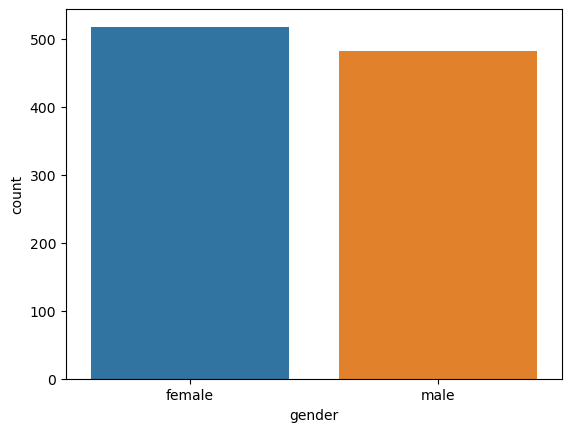

In [76]:
Plot = sns.countplot(x='gender',data=df)
Img = Plot.get_figure()
Img.savefig("/Users/saikarthiknaladala/Downloads/Principles_of_Data_Science/studentperformance/results/TotalStudents_Basedon_Gender.png")

#### The below scatter plot shows the relation between the average score and reading score. These are grouped by gender

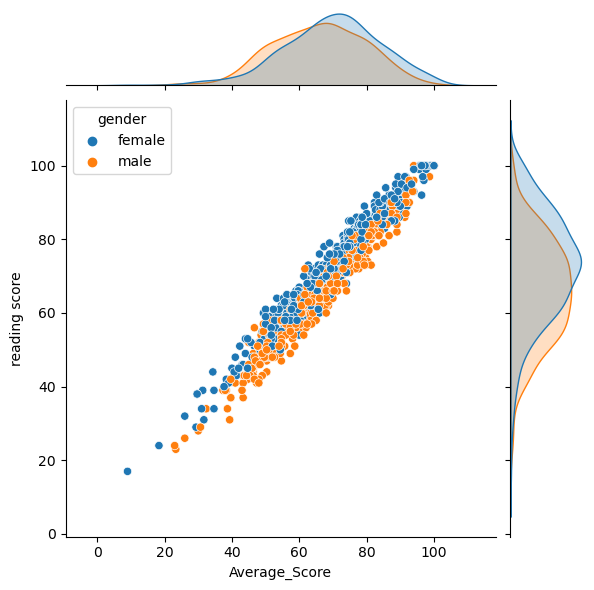

In [100]:
sns.jointplot(x = 'Average_Score', y = 'reading score',hue='gender', data = df)